In [1]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from wordcloud import WordCloud

In [2]:
# Load the datasets
companies = pd.read_csv('/kaggle/input/sp-500-stocks/sp500_companies.csv')
index = pd.read_csv('/kaggle/input/sp-500-stocks/sp500_index.csv')
stocks = pd.read_csv('/kaggle/input/sp-500-stocks/sp500_stocks.csv')

# Preview the datasets
print("Companies Dataset:")
display(companies.head())

print("Index Dataset:")
display(index.head())

print("Stocks Dataset:")
display(stocks.head())

Companies Dataset:


,Exchange,Symbol,Shortname,Longname,Sector,Industry,Currentprice,Marketcap,Ebitda,Revenuegrowth,City,State,Country,Fulltimeemployees,Longbusinesssummary,Weight
0,NMS,AAPL,Apple Inc.,Apple Inc.,Technology,Consumer Electronics,254.49,3846819807232,1.346610e+11,0.061,Cupertino,CA,United States,164000.0,"Apple Inc. designs, manufactures, and markets ...",0.069209
1,NMS,NVDA,NVIDIA Corporation,NVIDIA Corporation,Technology,Semiconductors,134.70,3298803056640,6.118400e+10,1.224,Santa Clara,CA,United States,29600.0,NVIDIA Corporation provides graphics and compu...,0.059350
2,NMS,MSFT,Microsoft Corporation,Microsoft Corporation,Technology,Software - Infrastructure,436.60,3246068596736,1.365520e+11,0.160,Redmond,WA,United States,228000.0,Microsoft Corporation develops and supports so...,0.058401
3,NMS,AMZN,"Amazon.com, Inc.","Amazon.com, Inc.",Consumer Cyclical,Internet Retail,224.92,2365033807872,1.115830e+11,0.110,Seattle,WA,United States,1551000.0,"Amazon.com, Inc. engages in the retail sale of...",0.042550
4,NMS,GOOGL,Alphabet Inc.,Alphabet Inc.,Communication Services,Internet Content & Information,191.41,2351625142272,1.234700e+11,0.151,Mountain View,CA,United States,181269.0,Alphabet Inc. offers various products and plat...,0.042309


Index Dataset:


,Date,S&P500
0,2014-12-22,2078.54
1,2014-12-23,2082.17
2,2014-12-24,2081.88
3,2014-12-26,2088.77
4,2014-12-29,2090.57


Stocks Dataset:


,Date,Symbol,Adj Close,Close,High,Low,Open,Volume
0,2010-01-04,MMM,NaN,NaN,NaN,NaN,NaN,NaN
1,2010-01-05,MMM,NaN,NaN,NaN,NaN,NaN,NaN
2,2010-01-06,MMM,NaN,NaN,NaN,NaN,NaN,NaN
3,2010-01-07,MMM,NaN,NaN,NaN,NaN,NaN,NaN
4,2010-01-08,MMM,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
# Load the datasets
companies = pd.read_csv('/kaggle/input/sp-500-stocks/sp500_companies.csv')
index = pd.read_csv('/kaggle/input/sp-500-stocks/sp500_index.csv')
stocks = pd.read_csv('/kaggle/input/sp-500-stocks/sp500_stocks.csv')

# Forward fill missing stock prices
stocks = stocks.ffill()  # Forward fill missing values

# Convert date columns to datetime format
index['Date'] = pd.to_datetime(index['Date'])
stocks['Date'] = pd.to_datetime(stocks['Date'])

# Check for missing values after filling
print("Missing values in stocks dataset after forward fill:")
print(stocks.isnull().sum())

Missing values in stocks dataset after forward fill:
Date            0
Symbol          0
Adj Close    3768
Close        3768
High         3768
Low          3768
Open         3768
Volume       3768
dtype: int64


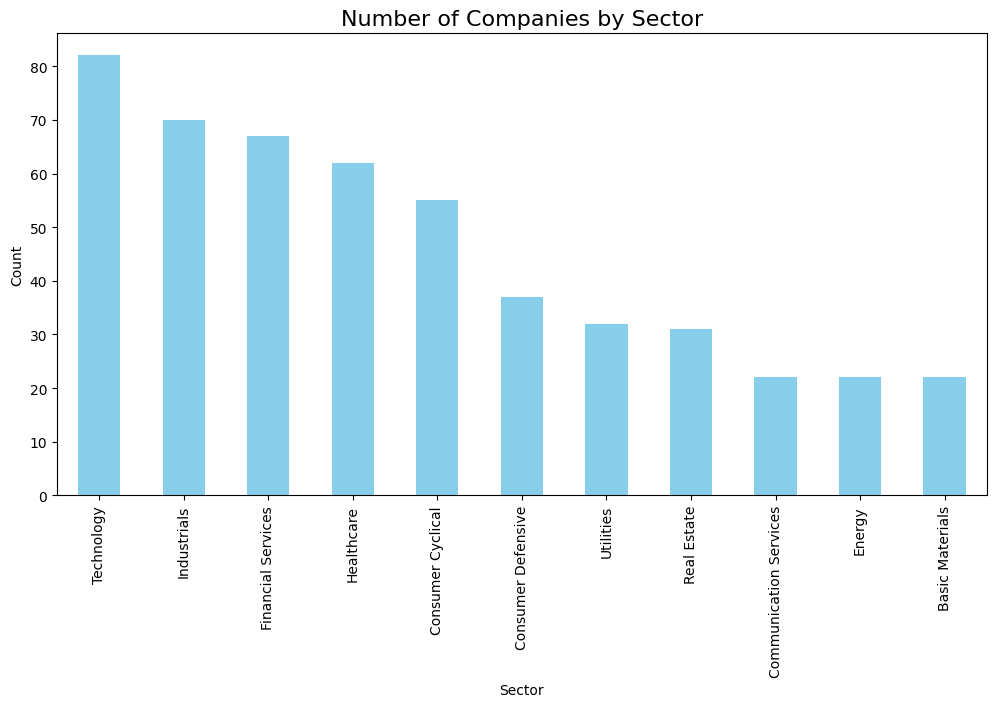

In [4]:
#EDA
plt.figure(figsize=(12, 6))
companies['Sector'].value_counts().plot(kind='bar', color='skyblue')
plt.title('Number of Companies by Sector', fontsize=16)
plt.ylabel('Count')
plt.show()

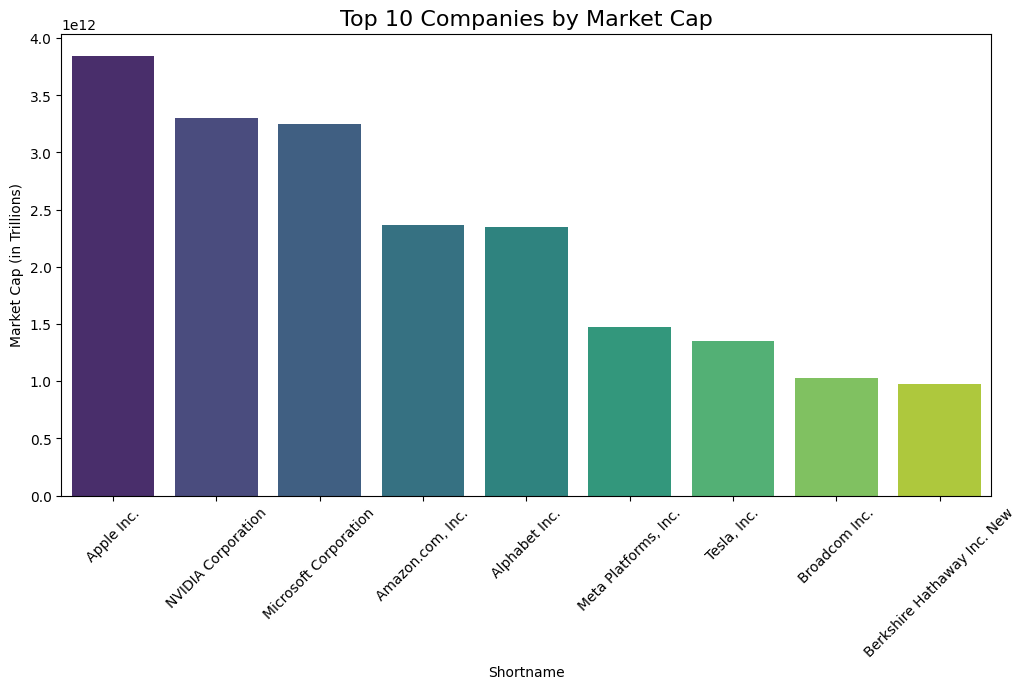

In [5]:
top_companies = companies.nlargest(10, 'Marketcap')

plt.figure(figsize=(12, 6))
sns.barplot(x='Shortname', y='Marketcap', data=top_companies, palette='viridis')
plt.title('Top 10 Companies by Market Cap', fontsize=16)
plt.xticks(rotation=45)
plt.ylabel('Market Cap (in Trillions)')
plt.show()

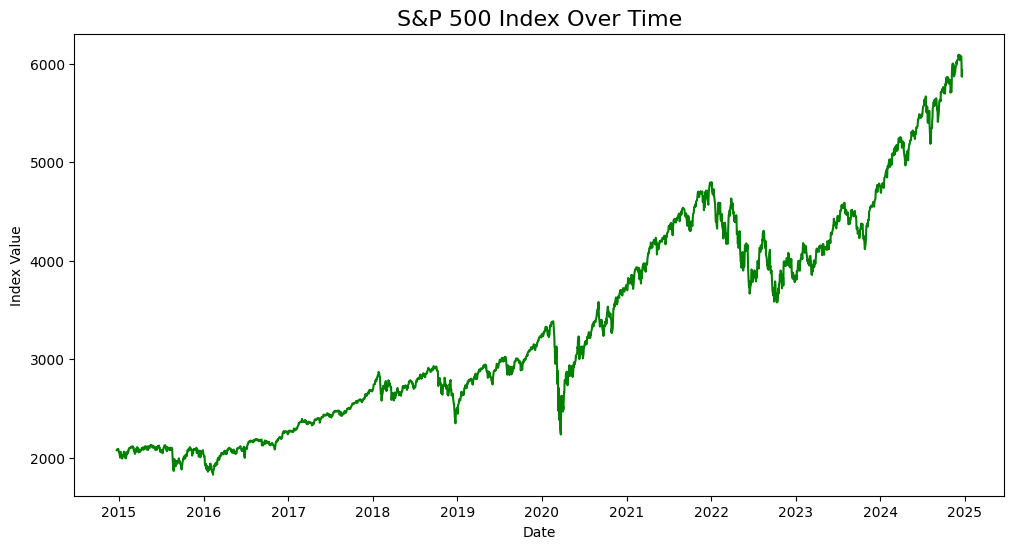

In [6]:
plt.figure(figsize=(12, 6))
plt.plot(index['Date'], index['S&P500'], color='green')
plt.title('S&P 500 Index Over Time', fontsize=16)
plt.xlabel('Date')
plt.ylabel('Index Value')
plt.show()

In [7]:
fig = px.line(index, x='Date', y='S&P500', title='S&P 500 Index Over Time', 
              labels={'Date': 'Date', 'S&P500': 'Index Value'})
fig.update_traces(line_color='green')
fig.show()

In [8]:
fig = px.pie(companies, names='Sector', values='Marketcap', 
             title='Sector-Wise Market Cap Distribution', hole=0.3, 
             color_discrete_sequence=px.colors.sequential.RdBu)
fig.show()

In [9]:
fig = px.scatter(companies, x='Revenuegrowth', y='Ebitda', 
                 size='Marketcap', color='Sector', hover_name='Shortname',
                 title='Bubble Chart: Revenue Growth vs EBITDA', 
                 labels={'Revenuegrowth': 'Revenue Growth', 'Ebitda': 'EBITDA'})
fig.show()

In [10]:
fig = px.scatter(index, x='Date', y='S&P500', animation_frame='Date', 
                 size=[50]*len(index), title='S&P 500 Index Animation', 
                 labels={'S&P500': 'Index Value'}, color_discrete_sequence=['blue'])
fig.show()

In [11]:
import plotly.express as px
import pandas as pd

# Sample Data
data = {'Sector': ['Tech', 'Health', 'Finance'], 'Marketcap': [1.5, 0.9, 1.2]}
df = pd.DataFrame(data)

# Create a Pie Chart
fig = px.pie(df, names='Sector', values='Marketcap', title='Sector-wise Market Cap')
fig.write_html('sector_pie_chart.html')  # Save as HTML

# Display in Kaggle Notebook
from IPython.display import IFrame
IFrame(src='sector_pie_chart.html', width=700, height=500)

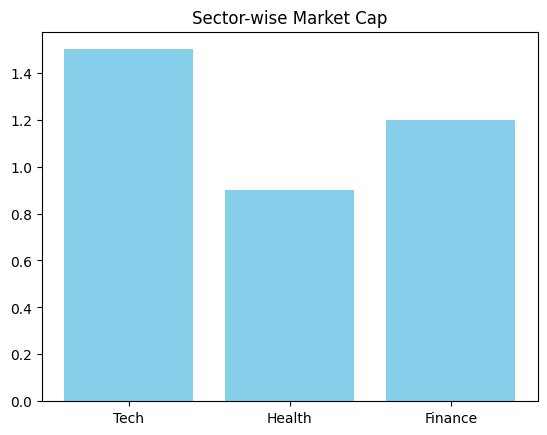

In [12]:
import matplotlib.pyplot as plt

# Generate a Bar Chart
sectors = ['Tech', 'Health', 'Finance']
marketcaps = [1.5, 0.9, 1.2]
plt.bar(sectors, marketcaps, color='skyblue')
plt.title('Sector-wise Market Cap')
plt.savefig('bar_chart.png')  # Save as PNG

# Embed the Image in HTML
html_content = f"""
<html>
<head><title>Sector Visualization</title></head>
<body>
<h1>Sector-wise Market Cap</h1>
<img src="bar_chart.png" alt="Bar Chart">
</body>
</html>
"""

# Save the HTML Report
with open('sector_bar_chart.html', 'w') as file:
    file.write(html_content)

# Display in Kaggle Notebook
from IPython.display import IFrame
IFrame(src='sector_bar_chart.html', width=700, height=500)

In [13]:
# Create Final HTML Report
html_content = f"""
<html>
<head>
    <title>S&P 500 Analysis Report</title>
</head>
<body>
    <h1 style="text-align: center;">S&P 500 Analysis Report</h1>

    <h2>Static Visualization: Bar Chart</h2>
    <p>This bar chart shows the sector-wise market capitalization.</p>
    <img src="bar_chart.png" alt="Bar Chart" width="600">

    <h2>Interactive Visualization: Pie Chart</h2>
    <p>This pie chart visualizes the distribution of market capitalization across sectors.</p>
    <iframe src="pie_chart.html" width="700" height="500"></iframe>

    <h2>Comprehensive Data Analysis</h2>
    <p>The following is a detailed profiling report of the dataset:</p>
    <iframe src="profile_report.html" width="1000" height="600"></iframe>
</body>
</html>
"""

# Save the HTML file
with open("final_report.html", "w") as file:
    file.write(html_content)

# Display the report within the notebook
from IPython.display import IFrame
IFrame(src='final_report.html', width=1100, height=800)